In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'1.9.0'

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

In [6]:
import numpy as np

import keras
import keras.backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras import models
from matplotlib import cm
import matplotlib.pyplot as plt
from vis.visualization import visualize_saliency
from vis.visualization import visualize_cam
from vis.utils import utils
from keras import activations


plt.rcParams['figure.figsize'] = (16, 8)

In [5]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

In [6]:
for layer in model.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [31]:
import os
import glob
df_dir= "data3/AKIEC/"
images = glob.glob(os.path.join(df_dir, "*.jpg"))
images

['data3/AKIEC/ISIC_0031191.jpg',
 'data3/AKIEC/RB_ISIC_0032455.jpg',
 'data3/AKIEC/RB_RC_ISIC_0024539.jpg',
 'data3/AKIEC/RB_ISIC_0031191.jpg',
 'data3/AKIEC/RB_RC_hf_ISIC_0032455.jpg',
 'data3/AKIEC/RB_hf_ISIC_0024539.jpg',
 'data3/AKIEC/hf_ISIC_0026171.jpg',
 'data3/AKIEC/ISIC_0032455.jpg',
 'data3/AKIEC/RB_ISIC_0032277.jpg',
 'data3/AKIEC/RB_RC_hf_ISIC_0032349.jpg',
 'data3/AKIEC/ISIC_0033456.jpg',
 'data3/AKIEC/RB_ISIC_0031852.jpg',
 'data3/AKIEC/ISIC_0033413.jpg',
 'data3/AKIEC/RB_ISIC_0031012.jpg',
 'data3/AKIEC/hf_ISIC_0026206.jpg',
 'data3/AKIEC/hf_ISIC_0026645.jpg']

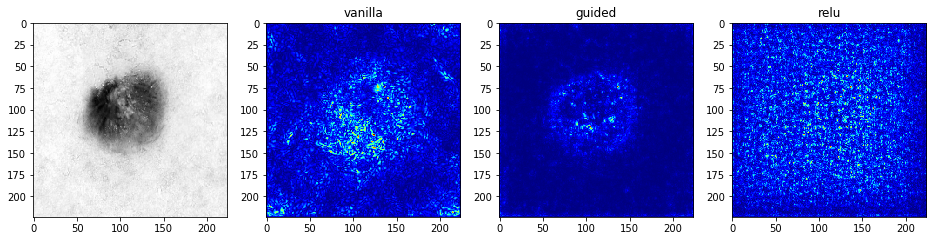

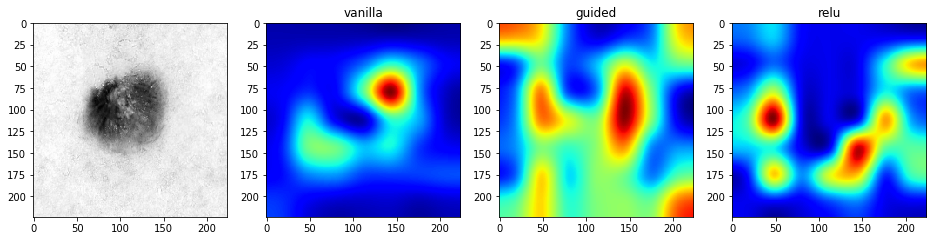

In [11]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1
# idx=6
img = utils.load_img('data3/AKIEC/ISIC_0031191.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')


f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')
plt.savefig('saliency-cam/AKIEC-ISIC_0031191-1.png', bbox_inches='tight', dpi = 100) 

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.savefig('saliency-cam/AKIEC-ISIC_0031191-2.png', bbox_inches='tight', dpi = 100) 
plt.show()

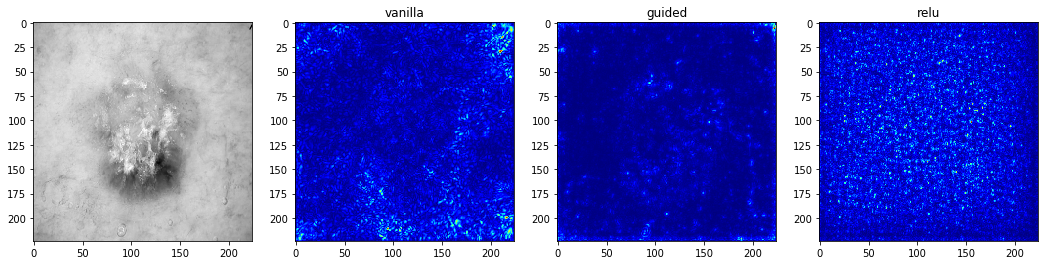

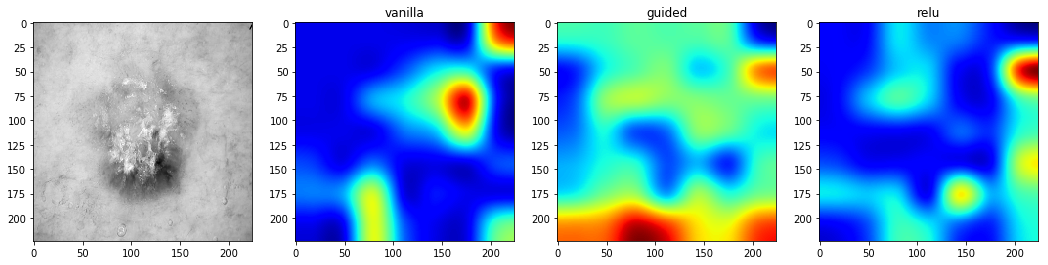

In [33]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/RB_ISIC_0032455.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

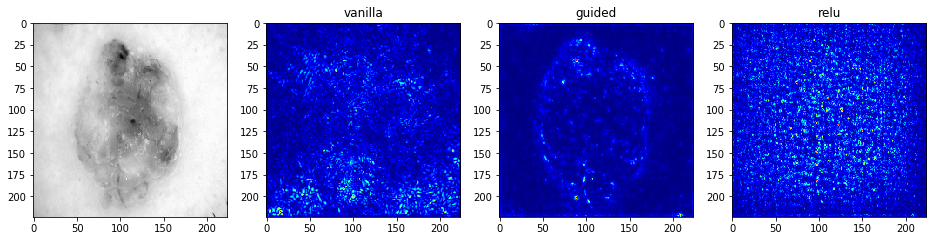

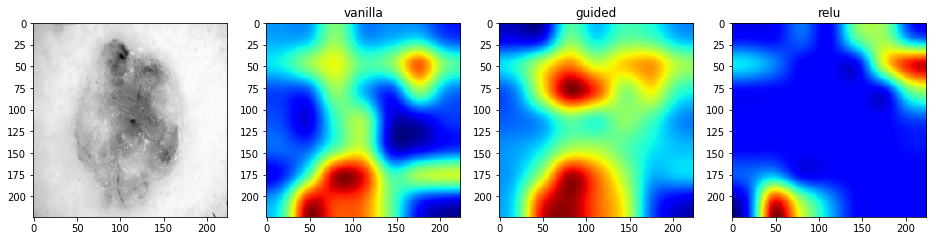

In [12]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/RB_RC_ISIC_0024539.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')
plt.savefig('saliency-cam/AKIEC-RB_RC_ISIC_0024539-1.png', bbox_inches='tight', dpi = 100) 

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')
plt.savefig('saliency-cam/AKIEC-RB_RC_ISIC_0024539-2.png', bbox_inches='tight', dpi = 100) 
plt.show()

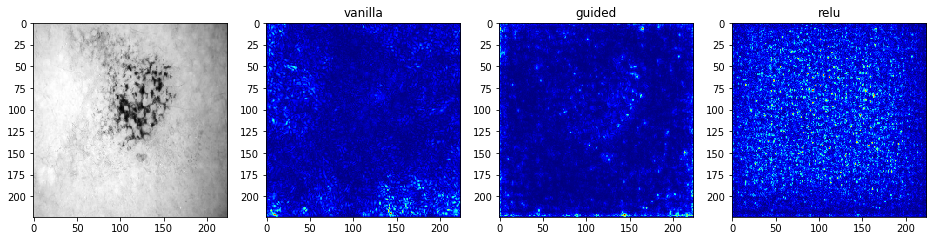

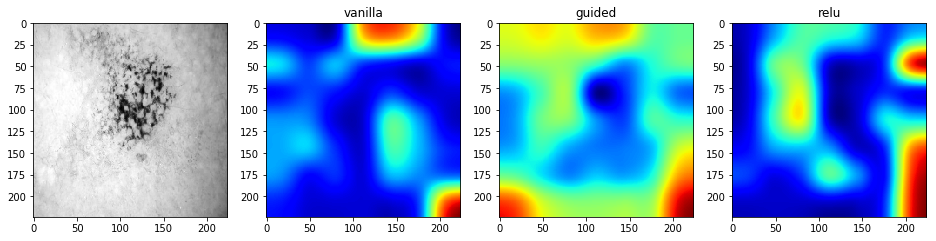

In [15]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/hf_ISIC_0026171.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

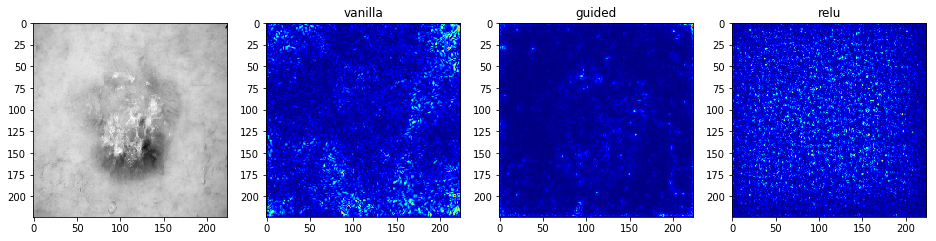

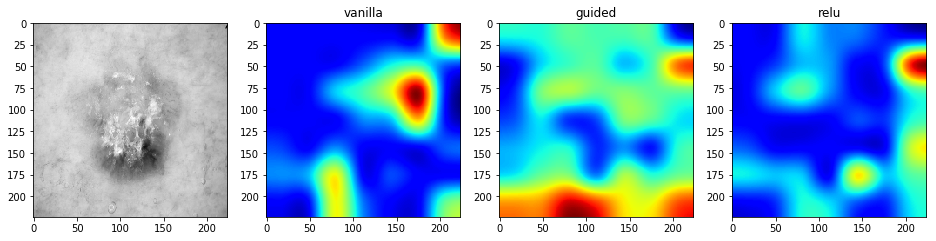

In [16]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/ISIC_0032455.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

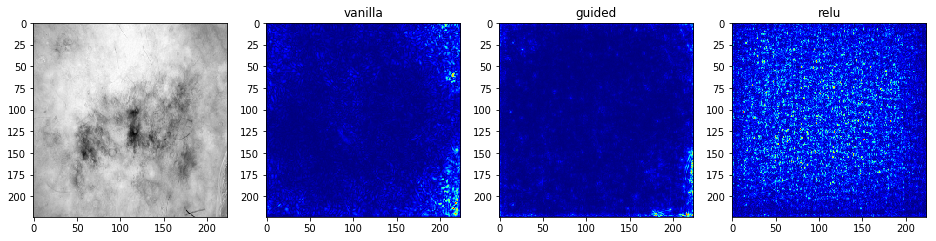

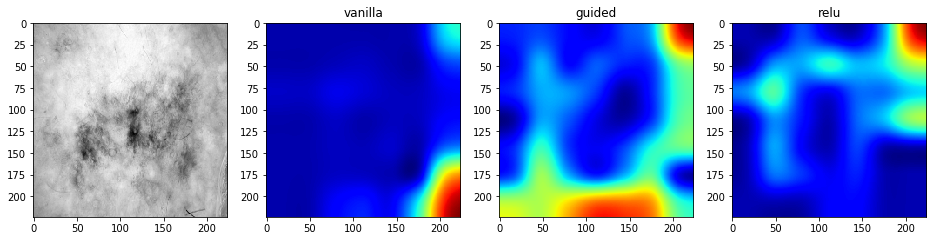

In [17]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/RB_ISIC_0032277.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

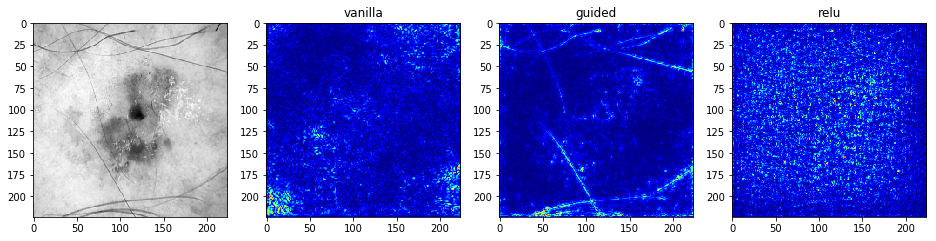

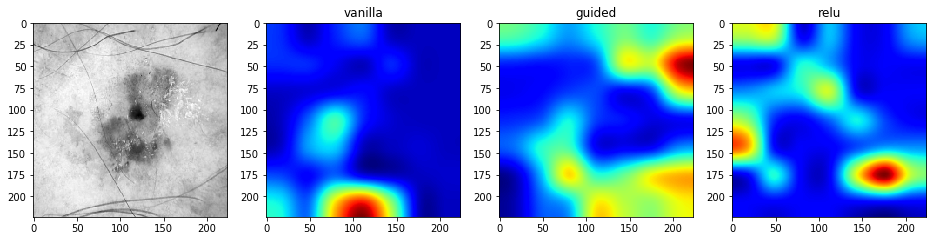

In [18]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/RB_RC_hf_ISIC_0032349.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

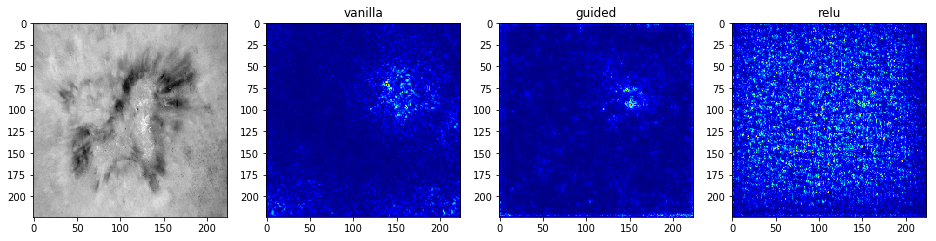

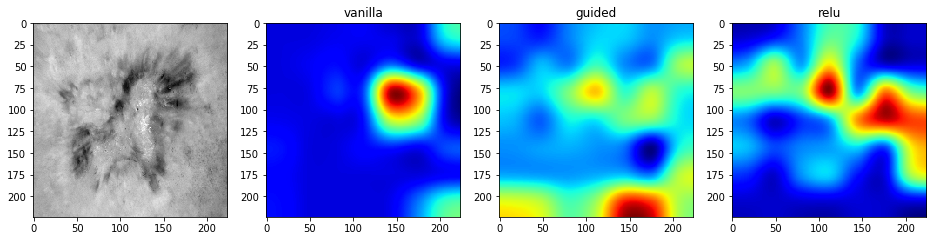

In [13]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/ISIC_0033456.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')
plt.savefig('saliency-cam/AKIEC-ISIC_0033456-1.png', bbox_inches='tight', dpi = 100) 
f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')
plt.savefig('saliency-cam/AKIEC-ISIC_0033456-2.png', bbox_inches='tight', dpi = 100) 
plt.show()

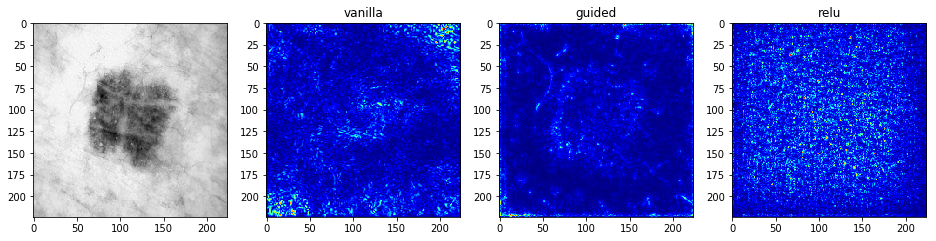

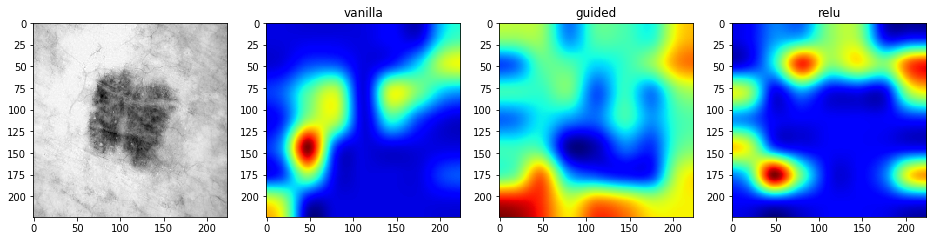

In [16]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/RB_ISIC_0031852.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

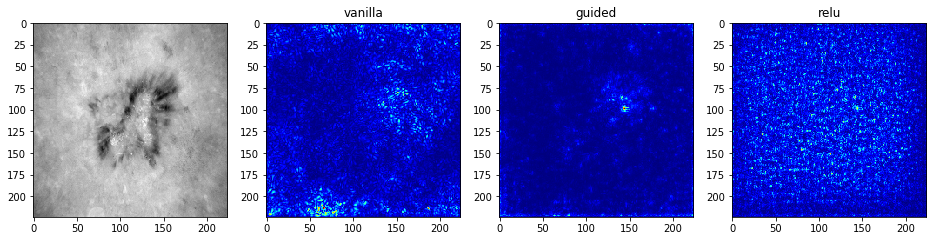

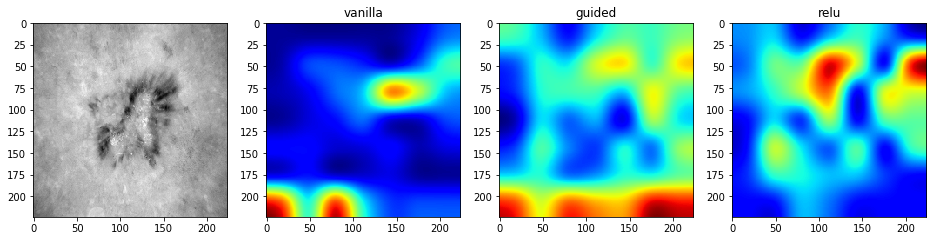

In [17]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/ISIC_0033413.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

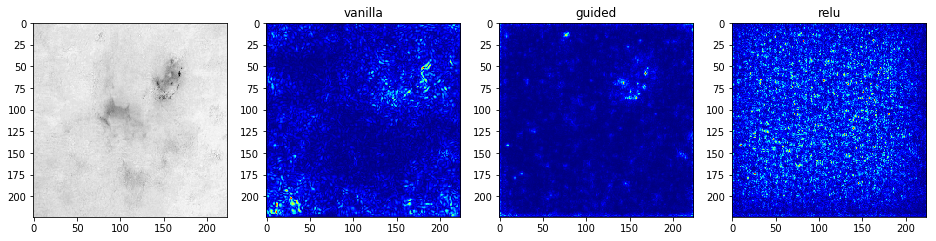

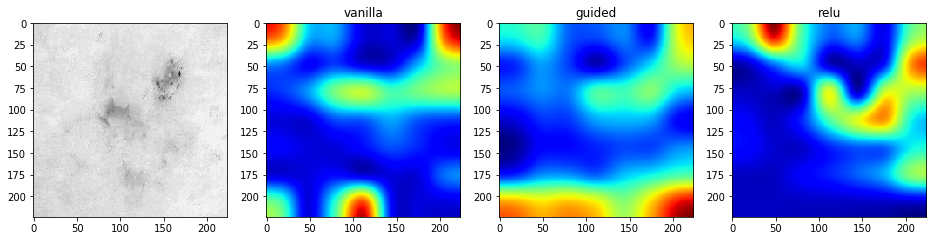

In [18]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/RB_ISIC_0031012.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

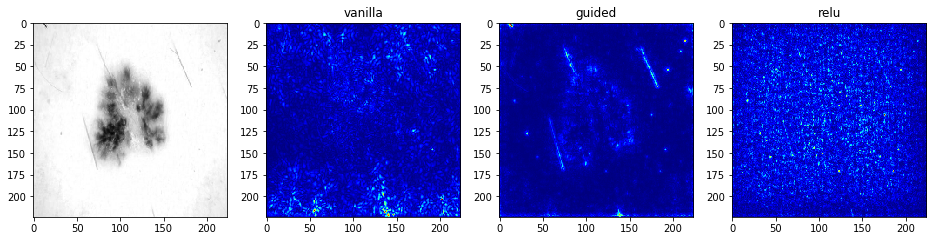

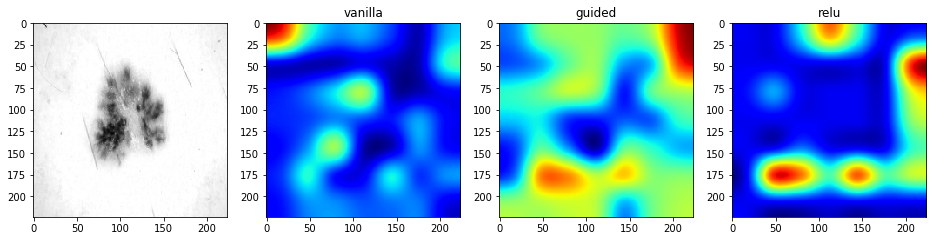

In [19]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/hf_ISIC_0026206.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()

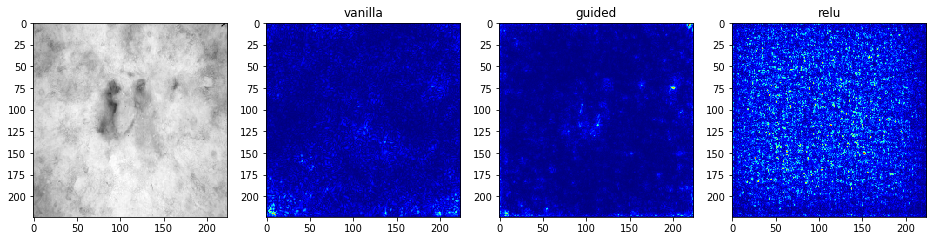

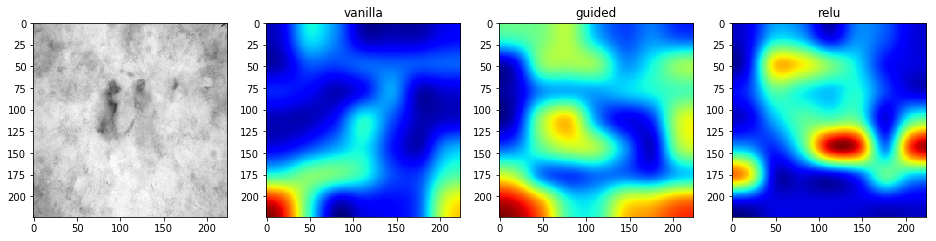

In [20]:
layer_idx = utils.find_layer_idx(model, 'predictions')
class_idx = 1

img = utils.load_img('data3/AKIEC/hf_ISIC_0026645.jpg', target_size=(224, 224))

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# Saliency:  
grads_saliency_vanilla = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier=None)
grads_saliency_guided = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='guided')
grads_saliency_relu = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                                    seed_input=img, backprop_modifier='relu')
# grad-CAM:
grads_cam_vanilla = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier=None)  
grads_cam_guided = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='guided')  
grads_cam_relu = visualize_cam(model, layer_idx, filter_indices=class_idx,
                          seed_input=img, backprop_modifier='relu')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0],  cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_saliency_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_saliency_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_saliency_relu, cmap='jet')

f, ax = plt.subplots(1, 4)
ax[0].imshow(img[..., 0], cmap='gray')
ax[1].set_title('vanilla')    
ax[1].imshow(grads_cam_vanilla, cmap='jet')
ax[2].set_title('guided')    
ax[2].imshow(grads_cam_guided, cmap='jet')
ax[3].set_title('relu')    
ax[3].imshow(grads_cam_relu, cmap='jet')

plt.show()